# Comparing PyWGCNA objects to gene marker from single cell data
you can also compare single cell/nucleus gene marker table to pyWGCNA objects to deconvolve which cells are driving the changes observed in the previously collected bulk datasets.

## Read PyWGCNA object
First you need to read your PyWGCNa object by `readWGCNA()` function and read gene marker table

In [1]:
import PyWGCNA
pyWGCNA_3xTgAD = PyWGCNA.readWGCNA("3xTgAD_paper/3xTgAD.p")

Reading 3xTgAD WGCNA done!


## Read gene marker list

your gene marker table should have genes as a index and a column called `geneModules` which shows you which gene belong to which module (cluster)

In [2]:
import pandas as pd
sn_3xTgAD = pd.read_csv("3xTgAD_paper/sn_cluster_3xTgAD.csv", index_col=0)
sn_3xTgAD["moduleColors"] = "N" + sn_3xTgAD["cluster"].astype(str)
sn_3xTgAD.head(5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,gene_id,cellType,moduleColors
Gm28928,0.0,2.197190,0.579,0.102,0.0,1,Gm28928,Gm28928,Neuron,N1
ENSMUSG00000059742,0.0,1.902920,0.801,0.227,0.0,1,Kcnh7,ENSMUSG00000059742,Neuron,N1
ENSMUSG00000028399,0.0,1.887287,0.990,0.528,0.0,1,Ptprd,ENSMUSG00000028399,Neuron,N1
ENSMUSG00000062991,0.0,1.800752,0.845,0.261,0.0,1,Nrg1,ENSMUSG00000062991,Neuron,N1
ENSMUSG00000056158,0.0,1.735965,0.599,0.150,0.0,1,Car10,ENSMUSG00000056158,Neuron,N1


## Comparing PyWGCNA object to single-cell/nucleus gene marker table
After reading the objects and table you only need to call `compareSingleCell()` function on the PyWGCNA object and sn/sc table, you can find the comparison results as a table in `comparison` variable.

In [3]:
comparison = PyWGCNA.compareSingleCell(PyWGCNAs=[pyWGCNA_3xTgAD], 
                                       sc=sn_3xTgAD)

### Jacard similarity matrix

In [4]:
comparison.jaccard_similarity.head(5)

,3xTgAD:dimgray,3xTgAD:black,3xTgAD:dimgrey,3xTgAD:darkgrey,3xTgAD:darkgray,3xTgAD:brown,3xTgAD:salmon,3xTgAD:lightgray,3xTgAD:silver,3xTgAD:lightgrey,...,single_cell:N22,single_cell:N23,single_cell:N24,single_cell:N25,single_cell:N26,single_cell:N27,single_cell:N28,single_cell:N29,single_cell:N30,single_cell:N31
3xTgAD:dimgray,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006758,0.005850,0.002938,0.009901,0.002749,0.042561,0.032418,0.014180,0.017537,0.024305
3xTgAD:black,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004836,0.002429,0.002073,0.003507,0.001220,0.008340,0.015463,0.007622,0.012072,0.014408
3xTgAD:dimgrey,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020275,0.005909,0.002983,0.006477,0.005339,0.012534,0.064603,0.017740,0.050657,0.020294
3xTgAD:darkgrey,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001582,0.003478,0.020833,0.009756,0.000000,0.058411,0.006673,0.006427,0.003448,0.004090
3xTgAD:darkgray,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.003035,0.003317,0.001767,0.007764,0.000000,0.004301,0.000000,0.007453,0.001111,0.008991


### Fraction matrix

In [10]:
comparison.fraction.head(5)

,3xTgAD:dimgray,3xTgAD:black,3xTgAD:dimgrey,3xTgAD:darkgrey,3xTgAD:darkgray,3xTgAD:brown,3xTgAD:salmon,3xTgAD:lightgray,3xTgAD:silver,3xTgAD:lightgrey,...,single_cell:N22,single_cell:N23,single_cell:N24,single_cell:N25,single_cell:N26,single_cell:N27,single_cell:N28,single_cell:N29,single_cell:N30,single_cell:N31
3xTgAD:dimgray,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.727273,30.612245,25.000000,35.915493,29.787234,52.459016,30.675910,24.671053,23.857868,26.242545
3xTgAD:black,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.974026,20.408163,28.333333,20.422535,21.276596,16.627635,23.050260,21.052632,25.888325,24.453280
3xTgAD:dimgrey,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.259740,18.367347,15.000000,14.084507,34.042553,9.836066,37.261698,18.750000,41.116751,13.717694
3xTgAD:darkgrey,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.649351,2.040816,18.333333,4.225352,0.000000,11.709602,1.213172,1.644737,0.761421,0.795229
3xTgAD:darkgray,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.298701,2.040816,1.666667,3.521127,0.000000,0.936768,0.000000,1.973684,0.253807,1.789264


### P-value matrix

In [11]:
comparison.P_value.head(5)

,3xTgAD:dimgray,3xTgAD:black,3xTgAD:dimgrey,3xTgAD:darkgrey,3xTgAD:darkgray,3xTgAD:brown,3xTgAD:salmon,3xTgAD:lightgray,3xTgAD:silver,3xTgAD:lightgrey,...,single_cell:N22,single_cell:N23,single_cell:N24,single_cell:N25,single_cell:N26,single_cell:N27,single_cell:N28,single_cell:N29,single_cell:N30,single_cell:N31
3xTgAD:dimgray,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.766254e-01,0.125010,8.798118e-01,0.001503,0.391994,1.964287e-37,2.480458e-04,8.922567e-01,1.000000e+00,2.453006e-01
3xTgAD:black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.082690e-04,0.000153,1.113539e-01,0.000004,0.015645,1.174340e-23,5.999019e-16,2.472227e-11,6.502300e-08,9.471931e-12
3xTgAD:dimgrey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.089016e-15,0.242339,8.520238e-01,1.000000,0.000452,9.240299e-03,4.897528e-45,2.450698e-02,2.734411e-40,8.459355e-01
3xTgAD:darkgrey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.713602e-01,1.000000,9.450371e-08,0.143512,0.628642,1.345303e-21,8.854067e-02,3.326949e-01,3.893288e-02,5.815179e-03
3xTgAD:darkgray,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.929283e-01,1.000000,1.000000e+00,0.398171,0.630826,5.266844e-02,1.254047e-06,8.493174e-01,1.297562e-03,4.602485e-01


## Ploting comparison
THere is two options to plot the results:

1. You can plot the jaccard similarity matrix as a graph by using plot_jaccard_similarity() function.
2. plot all three matrix as once using plotHeatmapComparison() function.

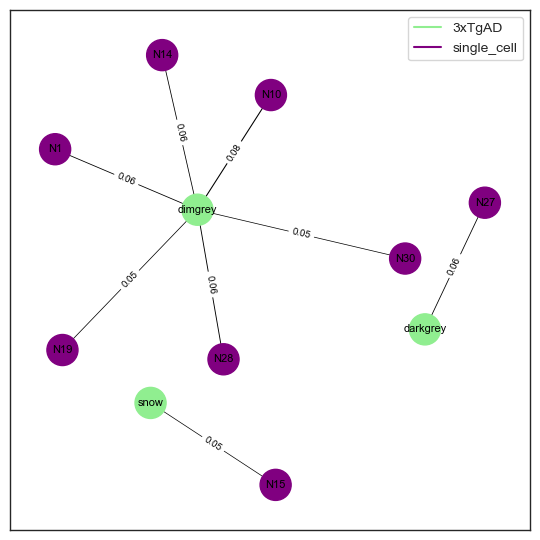

In [2]:
color = {"3xTgAD": "lightgreen", 
         "single_cell": "purple"}
comparison.plotJaccardSimilarity(color=color,
                                 cutoff=0.05,
                                 plot_format="pdf",
                                 file_name="jaccard_similarity_3xTgAD_sn")

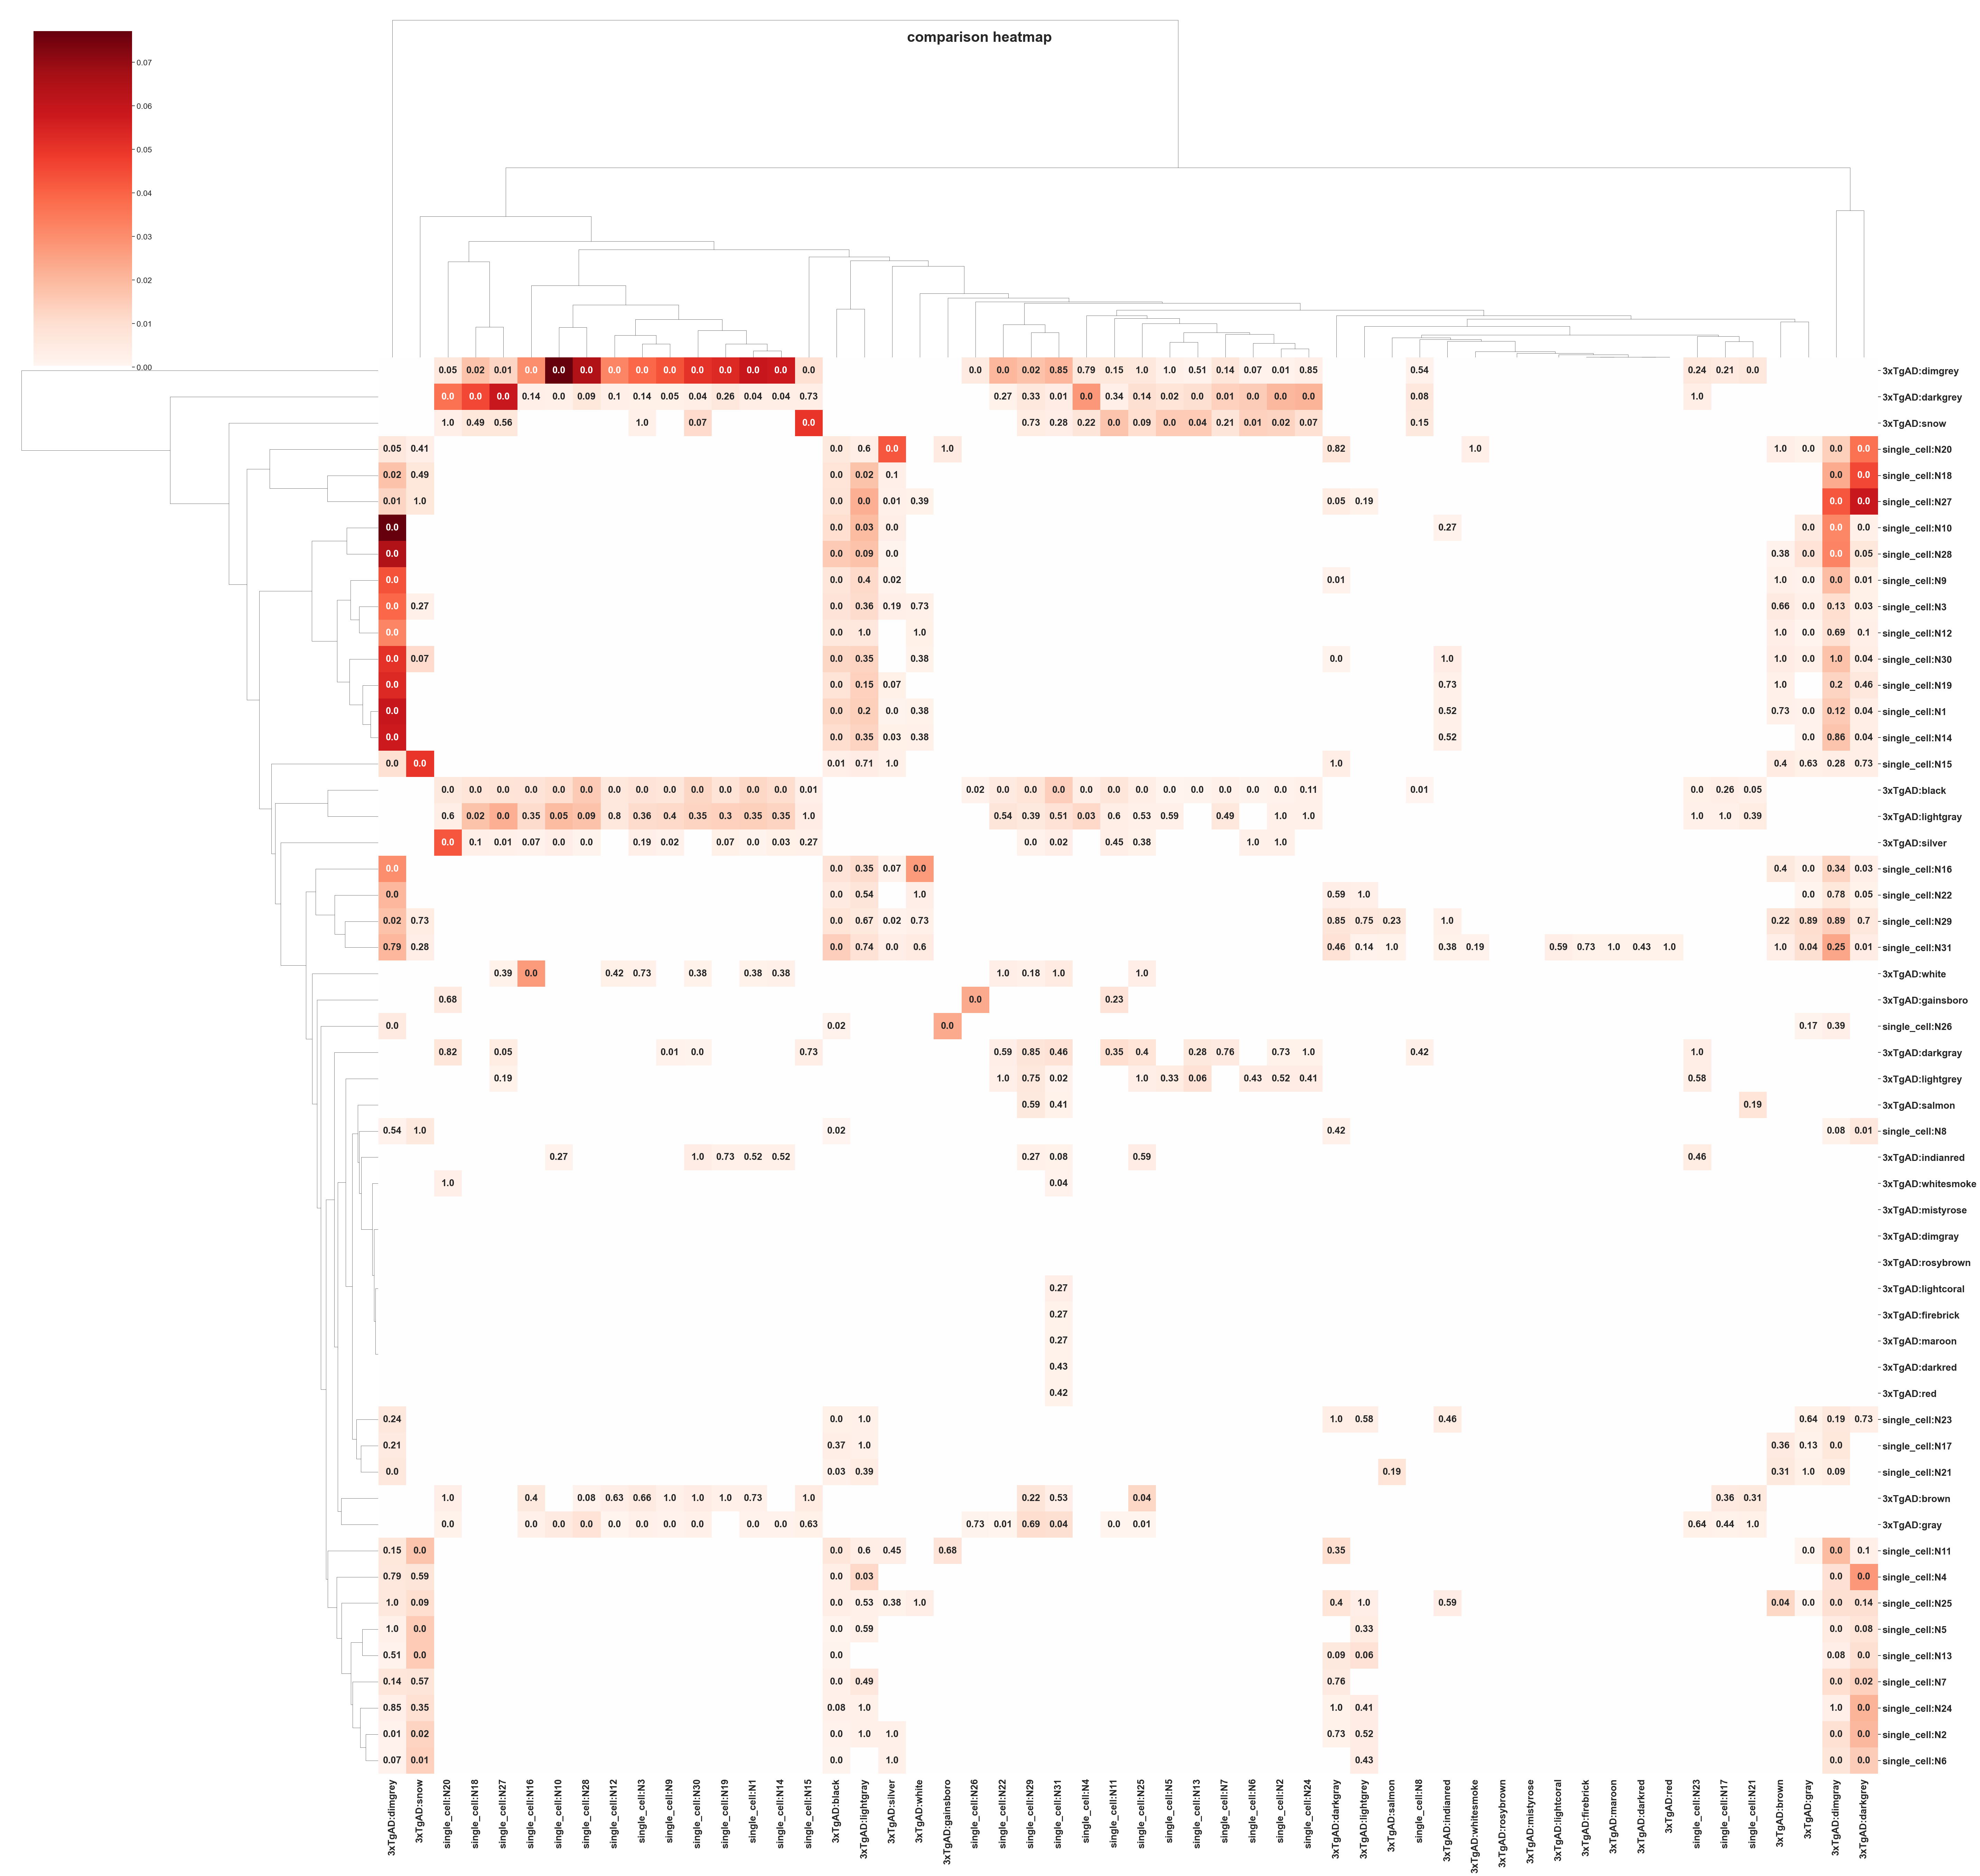

In [5]:
comparison.plotHeatmapComparison(plot_format="pdf",
                                 file_name="heatmap_comparison_3xTgAD_sn")

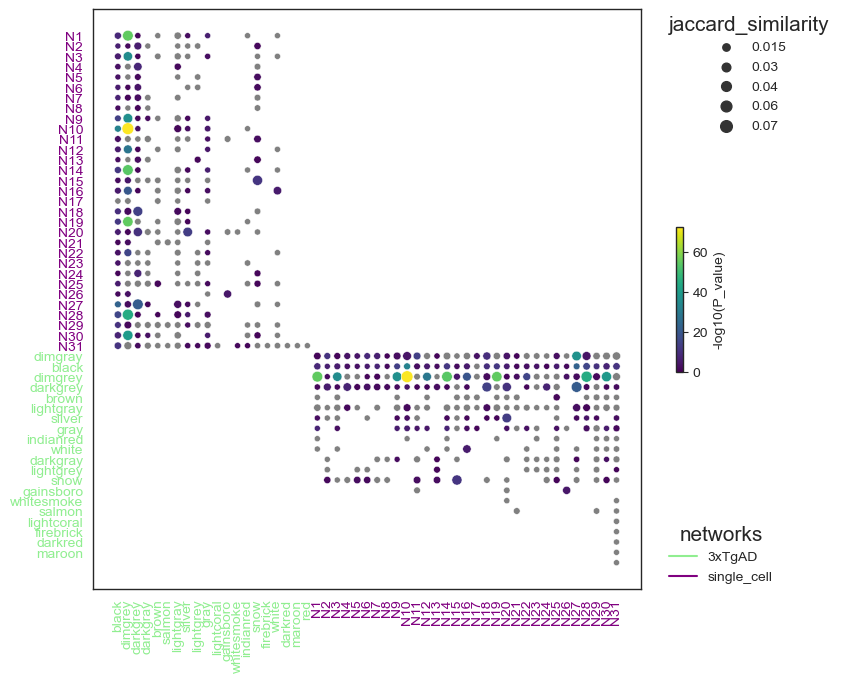

In [2]:
color = {"3xTgAD": "lightgreen", 
         "single_cell": "purple"}
comparison.plotBubbleComparison(color=color,
                                plot_format="pdf",
                                file_name="bubble_comparison_3xTgAD_sn")

## Saving and loading your comparison object
you can save or load your comparison object with saveComparison() or readComparison() function.

In [12]:
comparison.saveComparison(name="comparison_sn_3xTgAD")

Saving comparison as comparison_sn_3xTgAD.p


In [1]:
import sys
sys.path.insert(0, '/Users/nargesrezaie/Documents/MortazaviLab/PyWGCNA')
import PyWGCNA
comparison = PyWGCNA.readComparison('comparison_sn_3xTgAD.p')

Reading comparison done!
